In [11]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
ds = pd.read_csv('../data/mushrooms.csv')
ds.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [18]:
le = LabelEncoder()

df = ds.apply(le.fit_transform)


In [65]:
df['class'].value_counts() / df.shape[0]

0    0.517971
1    0.482029
Name: class, dtype: float64

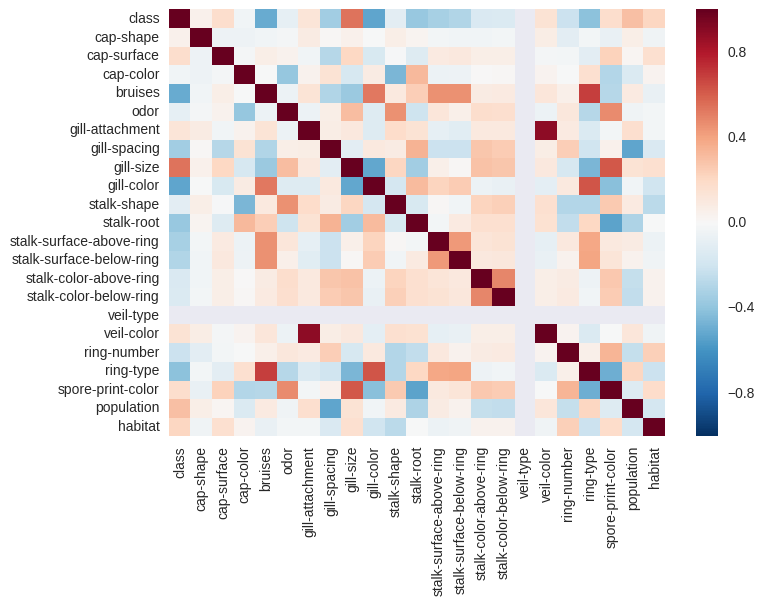

In [12]:
sns.heatmap(df.corr())

In [81]:
split = int(0.9 * df.values.shape[0])

train = df.loc[:split]
test = df.loc[split:]
test = test.reset_index().drop('index', axis=1)

In [51]:
def conditional_probability(data, feature_column, feature_value, label_column, label_value):
    n_rows = data.loc[(data[label_column] == label_value)]
    satisfy_condition = data.loc[(data[feature_column] == feature_value) &
                                 (data[label_column] == label_value)]
    return float(satisfy_condition.shape[0]) / n_rows.shape[0]

def prior_probability(data, label_column, label_value):
    n_rows = data.loc[data[label_column] == label_value]
    
    return float(n_rows.shape[0]) / data.shape[0]

In [95]:
pi = conditional_probability(train, 'cap-shape', 5, 'class', 1)
print pi
py = prior_probability(train, 'class', 1)
print py

CLASSES = [0, 1]

0.483107132544
0.473605032823


In [112]:
preds = []
for ix in range(test.shape[0]):
    val = test.loc[ix][1:]
    feature = dict(val)
    posterior = []
    for cx in CLASSES:
        likelihood = 1.0
        for fx in feature:
            cp = conditional_probability(train, fx, feature[fx], 'class', cx)
            likelihood *= cp
            # print cp
        #print likelihood
        prior = prior_probability(train, 'class', cx)
        #print prior
        
        posterior.append(prior * likelihood)
        #print '-'*80
    preds.append(np.asarray(posterior).argmax())

In [115]:
(preds == test['class']).sum() / float(test['class'].shape[0])

0.97539975399753998

# Sklearn classifiers

In [134]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.decomposition import PCA

In [132]:
nb = MultinomialNB()

nb.fit(train[train.columns[1:]], train['class'])
nb.score(test[test.columns[1:]], test['class'])

0.9015990159901599

In [133]:
gnb = GaussianNB()

gnb.fit(train[train.columns[1:]], train['class'])
gnb.score(test[test.columns[1:]], test['class'])

0.96678966789667897

In [138]:
pca = PCA(n_components=len(train.columns[1:]), whiten=True)

In [142]:
pca.fit(train[train.columns[1:]])
k = pca.transform(train[train.columns[1:]])

In [147]:
gnb = GaussianNB()

gnb.fit(pca.transform(train[train.columns[1:]]), train['class'])
gnb.score(pca.transform(test[test.columns[1:]]), test['class'])

0.98031980319803202